In [1]:
#analytical linear regression

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [3]:
file_url = "./archive/Salary_Data.csv"
data_frame = pd.read_csv(file_url)

In [4]:
train, test = train_test_split(data_frame)

In [5]:

x_i, t_i = np.array(train["YearsExperience"]), np.array(train["Salary"])

weights = np.array([0, 0])
total_obs = len(x_i)
sum_xi = np.sum(x_i)
sum_ti = np.sum(t_i)
sum_xi2 = np.sum(x_i**2)
sum_xiti = np.sum(x_i*t_i)

mat_LHS = np.array([sum_xi2, sum_xi, sum_xi, total_obs]).reshape(2,2)
mat_RHS = np.array([sum_xiti, sum_ti]).reshape(2,1)

weights = np.linalg.solve(mat_LHS, mat_RHS)


In [6]:
print("Weights: ", weights)

Weights:  [[ 9684.82967626]
 [24438.7077886 ]]


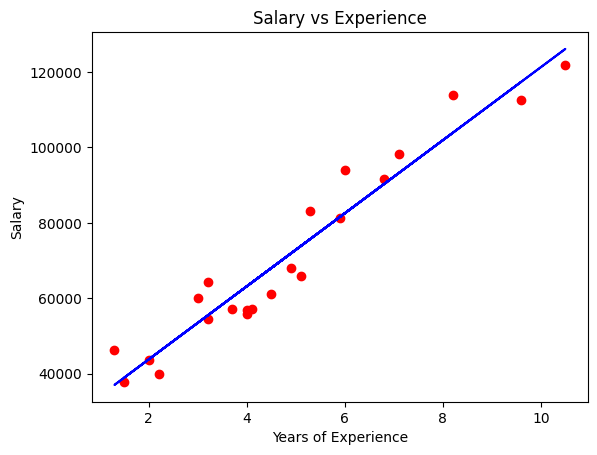

In [7]:
#plotting
plt.scatter(x_i, t_i, color = "red")
plt.plot(x_i, weights[0]*x_i + weights[1], color = "blue")
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


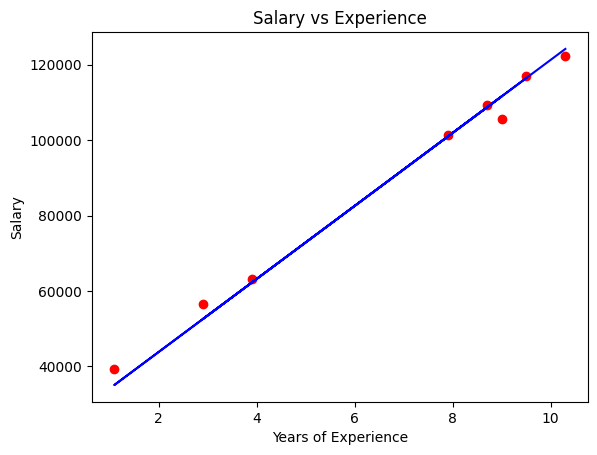

In [8]:
#testing
x_i, t_i = np.array(test["YearsExperience"]), np.array(test["Salary"])
y_pred = weights[0]*x_i + weights[1]

#plotting
plt.scatter(x_i, t_i, color = "red")
plt.plot(x_i, y_pred, color = "blue")
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


In [9]:
new_data = 5.45
y_pred = weights[0]*new_data + weights[1]

In [10]:
y_pred

array([77221.0295242])

In [19]:
for i in weights:
    print(i[0] )

9684.82967625582
24438.707788602616


In [16]:
weights

[array([9684.82967626]), array([24438.7077886])]

In [15]:
#save the weights 
with open('weights.txt','w') as file:
    for w in weights:
        file.write(str(w[0]) + "\n")